In [3]:
import transprs as tprs

In [4]:
processor_UKBB = tprs.read_input(prefix_test="tutorials/data/test_data_VN",
                test_phenotype="tutorials/data/test.phenotype",
                sumstats_path="tutorials/data/UKBB_height_sumstats.ss",
                prefix_validation="tutorials/data/val_data_VN",
                validation_phenotype="tutorials/data/validation.phenotype",
                workdir="workdir_UKBB_tutorial")

Reading the Test genotype...


Mapping files: 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]


Reading the Validation genotype...


Mapping files: 100%|██████████| 3/3 [00:01<00:00,  1.77it/s]


Phenotype stored in .phenotype
Phenotype stored in .phenotype_val


In [5]:
tprs.Preprocessing(processor_UKBB, n_components=6)

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp.log.
Options in effect:
--bfile tmp
--indep-pairwise 200 50 0.25
--out tmp

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999556.
987036 variants and 152 people pass filters and QC.
Note: No phenotypes present.
Pruned 72115 variants from chromosome 1, leaving 8751.
Pruned 73729 variants from 

rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp.log.
Options in effect:
--bfile tmp
--indep-pairwise 200 50 0.25
--out tmp

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999535.
987036 variants and 152 people pass filters and QC.
Note: No phenotypes present.
Pruned 72133 variants from chromosome 1, leaving 8733.
Pruned 73718 variants from 

rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


Stored sumstats workdir_UKBB_tutorial/preprocessed_sumstats in working directory
Stored test genotype workdir_UKBB_tutorial/preprocessed_test in working directory
Stored validation genotype workdir_UKBB_tutorial/preprocessed_test in working directory
Stored test genotype workdir_UKBB_tutorial/preprocessed_test in working directory


In [6]:
# Run P+T
tprs.methods.clumping(processor_UKBB)

tprs.scoring.generate_prs(processor_UKBB,method="clumping")

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="clumping",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_UKBB,method="clumping",validate=False)

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="clumping",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)


Clumping is running...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_out.log.
Options in effect:
--bfile workdir_UKBB_tutorial/preprocessed_validation
--clump workdir_UKBB_tutorial/preprocessed_sumstats
--clump-field P
--clump-kb 250
--clump-p1 1
--clump-r2 0.5
--clump-snp-field SNP
--out tmp_out

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_out.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping 

rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_UKBB_tutorial/preprocessed_validation
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_UKBB_tutorial/adjusted_sumstats_clumping 3 4 9 header sum

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 101112131415161718192021222324252627282930313233343536373839404142434445464748495051525354555657585960616263646566676869707172737475767778798081828384858687888990919293949596979899%

due to allele code mismatch); see tmp_results.nopred for details.


 done.
Total genotyping rate is 0.999535.
987036 variants and 152 people pass filters and QC.
Note: No phenotypes present.
--score: 183376 valid predictors loaded.
--score: 17 ranges processed.
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_validation['clumping']!
--- Done in 0:00:02 ---


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


The best fit p-value is 0.001
The best fit result is stored in processor.prs_validation['clumping']['best_fit']
The best fit result is stored in processor.tuning['clumping']['coef_squared']
Extracting adjusted sumstats from clumping method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_UKBB_tutorial/preprocessed_test
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_UKBB_tutorial/adjusted_sumstats_clumping 3 4 9 header sum

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present

due to allele code mismatch); see tmp_results.nopred for details.
rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


The best fit p-value is 0.001
The best fit result is stored in processor.prs_test['clumping']['best_fit']
The best fit result is stored in processor.performance['clumping']['coef_squared']


In [7]:
# Run double weight
tprs.methods.double_weight(processor_UKBB)

tprs.scoring.generate_prs(processor_UKBB,method="double_weight")

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="double_weight",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_UKBB,method="double_weight",validate=False)

tprs.metrics.coef_squared_evaluation(processor_UKBB,
                                     method="double_weight",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)

Double weight method is running...
[1] "Adjusted BETA is done!"
Done Double weight!
The double weight result stores in .adjusted_ss['double_weight']!
--- Done in 0:01:24 ---
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_UKBB_tutorial/preprocessed_validation
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_UKBB_tutorial/adjusted_sumstats_double_weight 3 4 9 header sum

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present

due to allele code mismatch); see tmp_results.nopred for details.


--score: 17 ranges processed.
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_validation['double_weight']!


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


--- Done in 0:00:03 ---
The best fit p-value is 0.2
The best fit result is stored in processor.prs_validation['double_weight']['best_fit']
The best fit result is stored in processor.tuning['double_weight']['coef_squared']
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_UKBB_tutorial/preprocessed_test
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_UKBB_tutorial/adjusted_sumstats_double_weight 3 4 9 header sum

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filte

due to allele code mismatch); see tmp_results.nopred for details.


--score: 1 range processed.
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_test['double_weight']!
--- Done in 0:00:02 ---
The best fit p-value is 0.2
The best fit result is stored in processor.prs_test['double_weight']['best_fit']
The best fit result is stored in processor.performance['double_weight']['coef_squared']


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


In [8]:
processor_VN = tprs.read_input(prefix_test="tutorials/data/test_data_VN",
                test_phenotype="tutorials/data/test.phenotype",
                sumstats_path="tutorials/data/VN_train_sumstats.ss",
                prefix_validation="tutorials/data/val_data_VN",
                validation_phenotype="tutorials/data/validation.phenotype",
                workdir="workdir_VN_tutorial")

Reading the Test genotype...


Mapping files: 100%|██████████| 3/3 [00:01<00:00,  1.73it/s]


Reading the Validation genotype...


Mapping files: 100%|██████████| 3/3 [00:01<00:00,  1.87it/s]


Phenotype stored in .phenotype
Phenotype stored in .phenotype_val


In [9]:
tprs.Preprocessing(processor_VN, n_components=6)

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp.log.
Options in effect:
--bfile tmp
--indep-pairwise 200 50 0.25
--out tmp

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999556.
987036 variants and 152 people pass filters and QC.
Note: No phenotypes present.
Pruned 72115 variants from chromosome 1, leaving 8751.
Pruned 73729 variants from 

rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp.log.
Options in effect:
--bfile tmp
--indep-pairwise 200 50 0.25
--out tmp

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999535.
987036 variants and 152 people pass filters and QC.
Note: No phenotypes present.
Pruned 72133 variants from chromosome 1, leaving 8733.
Pruned 73718 variants from 

rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


Created folder workdir_VN_tutorial for working directory
Stored sumstats workdir_VN_tutorial/preprocessed_sumstats in working directory
Stored test genotype workdir_VN_tutorial/preprocessed_test in working directory
Stored validation genotype workdir_VN_tutorial/preprocessed_test in working directory
Stored test genotype workdir_VN_tutorial/preprocessed_test in working directory


In [10]:
# Run P+T
tprs.methods.clumping(processor_VN)

tprs.scoring.generate_prs(processor_VN,method="clumping")

tprs.metrics.coef_squared_evaluation(processor_VN,
                                     method="clumping",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_VN,method="clumping",validate=False)

tprs.metrics.coef_squared_evaluation(processor_VN,
                                     method="clumping",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)


Clumping is running...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_out.log.
Options in effect:
--bfile workdir_VN_tutorial/preprocessed_validation
--clump workdir_VN_tutorial/preprocessed_sumstats
--clump-field P
--clump-kb 250
--clump-p1 1
--clump-r2 0.5
--clump-snp-field SNP
--out tmp_out

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_out.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate

rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


--- Done in 0:00:39 ---
Extracting adjusted sumstats from clumping method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_VN_tutorial/preprocessed_validation
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_VN_tutorial/adjusted_sumstats_clumping 3 4 9 header sum

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273

--score: 13 ranges processed (4 empty ranges skipped).
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_validation['clumping']!


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


--- Done in 0:00:02 ---
The best fit p-value is 0.000003
The best fit result is stored in processor.prs_validation['clumping']['best_fit']
The best fit result is stored in processor.tuning['clumping']['coef_squared']
Extracting adjusted sumstats from clumping method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_VN_tutorial/preprocessed_test
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_VN_tutorial/adjusted_sumstats_clumping 3 4 9 header sum

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders an

--- Done in 0:00:01 ---
The best fit p-value is 0.000003
The best fit result is stored in processor.prs_test['clumping']['best_fit']
The best fit result is stored in processor.performance['clumping']['coef_squared']


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


In [11]:
# Run double weight
tprs.methods.double_weight(processor_VN)

tprs.scoring.generate_prs(processor_VN,method="double_weight")

tprs.metrics.coef_squared_evaluation(processor_VN,
                                     method="double_weight",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_VN,method="double_weight",validate=False)

tprs.metrics.coef_squared_evaluation(processor_VN,
                                     method="double_weight",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)

Double weight method is running...
[1] "Adjusted BETA is done!"
Done Double weight!
The double weight result stores in .adjusted_ss['double_weight']!
--- Done in 0:02:04 ---
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_VN_tutorial/preprocessed_validation
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_VN_tutorial/adjusted_sumstats_double_weight 3 4 9 header sum

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Ca

--score: 13 ranges processed (4 empty ranges skipped).
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_validation['double_weight']!


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


--- Done in 0:00:03 ---
The best fit p-value is 0.00003
The best fit result is stored in processor.prs_validation['double_weight']['best_fit']
The best fit result is stored in processor.tuning['double_weight']['coef_squared']
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_VN_tutorial/preprocessed_test
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_VN_tutorial/adjusted_sumstats_double_weight 3 4 9 header sum

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filte

--- Done in 0:00:02 ---
The best fit p-value is 0.00003
The best fit result is stored in processor.prs_test['double_weight']['best_fit']
The best fit result is stored in processor.performance['double_weight']['coef_squared']


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


In [12]:
processor_JPN = tprs.read_input(prefix_test="tutorials/data/test_data_VN",
                test_phenotype="tutorials/data/test.phenotype",
                sumstats_path="tutorials/data/VN_train_sumstats.ss",
                prefix_validation="tutorials/data/val_data_VN",
                validation_phenotype="tutorials/data/validation.phenotype",
                workdir="workdir_VN_tutorial")

Reading the Test genotype...


Mapping files: 100%|██████████| 3/3 [00:01<00:00,  1.75it/s]


Reading the Validation genotype...


Mapping files: 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]


Phenotype stored in .phenotype
Phenotype stored in .phenotype_val


In [13]:
tprs.Preprocessing(processor_JPN, n_components=6)

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp.log.
Options in effect:
--bfile tmp
--indep-pairwise 200 50 0.25
--out tmp

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999556.
987036 variants and 152 people pass filters and QC.
Note: No phenotypes present.
Pruned 72115 variants from chromosome 1, leaving 8751.
Pruned 73729 variants from 

rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp.log.
Options in effect:
--bfile tmp
--indep-pairwise 200 50 0.25
--out tmp

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate is 0.999535.
987036 variants and 152 people pass filters and QC.
Note: No phenotypes present.
Pruned 72133 variants from chromosome 1, leaving 8733.
Pruned 73718 variants from 

rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


Stored sumstats workdir_VN_tutorial/preprocessed_sumstats in working directory
Stored test genotype workdir_VN_tutorial/preprocessed_test in working directory
Stored validation genotype workdir_VN_tutorial/preprocessed_test in working directory
Stored test genotype workdir_VN_tutorial/preprocessed_test in working directory


In [14]:
# Run P+T
tprs.methods.clumping(processor_JPN)

tprs.scoring.generate_prs(processor_JPN,method="clumping")

tprs.metrics.coef_squared_evaluation(processor_JPN,
                                     method="clumping",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_JPN,method="clumping",validate=False)

tprs.metrics.coef_squared_evaluation(processor_JPN,
                                     method="clumping",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)


Clumping is running...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_out.log.
Options in effect:
--bfile workdir_VN_tutorial/preprocessed_validation
--clump workdir_VN_tutorial/preprocessed_sumstats
--clump-field P
--clump-kb 250
--clump-p1 1
--clump-r2 0.5
--clump-snp-field SNP
--out tmp_out

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_out.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
Total genotyping rate

rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


--- Done in 0:00:40 ---
Extracting adjusted sumstats from clumping method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_VN_tutorial/preprocessed_validation
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_VN_tutorial/adjusted_sumstats_clumping 3 4 9 header sum

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273

--score: 13 ranges processed (4 empty ranges skipped).
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_validation['clumping']!


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


--- Done in 0:00:02 ---
The best fit p-value is 0.000003
The best fit result is stored in processor.prs_validation['clumping']['best_fit']
The best fit result is stored in processor.tuning['clumping']['coef_squared']
Extracting adjusted sumstats from clumping method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_VN_tutorial/preprocessed_test
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_VN_tutorial/adjusted_sumstats_clumping 3 4 9 header sum

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders an

--- Done in 0:00:01 ---
The best fit p-value is 0.000003
The best fit result is stored in processor.prs_test['clumping']['best_fit']
The best fit result is stored in processor.performance['clumping']['coef_squared']


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


In [15]:
# Run double weight
tprs.methods.double_weight(processor_JPN)

tprs.scoring.generate_prs(processor_JPN,method="double_weight")

tprs.metrics.coef_squared_evaluation(processor_JPN,
                                     method="double_weight",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    )

tprs.scoring.generate_prs(processor_JPN,method="double_weight",validate=False)

tprs.metrics.coef_squared_evaluation(processor_JPN,
                                     method="double_weight",
                                     trait_col="Height", 
                                     prs_col="SCORESUM",
                                    validate=False)

Double weight method is running...
[1] "Adjusted BETA is done!"
Done Double weight!
The double weight result stores in .adjusted_ss['double_weight']!
--- Done in 0:02:00 ---
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_VN_tutorial/preprocessed_validation
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_VN_tutorial/adjusted_sumstats_double_weight 3 4 9 header sum

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 152 founders and 0 nonfounders present.
Ca

--score: 13 ranges processed (4 empty ranges skipped).
Results written to tmp_results.*.profile.
PRS is generated!
The PRS result stores in .prs_validation['double_weight']!


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


--- Done in 0:00:03 ---
The best fit p-value is 0.00003
The best fit result is stored in processor.prs_validation['double_weight']['best_fit']
The best fit result is stored in processor.tuning['double_weight']['coef_squared']
Extracting adjusted sumstats from double_weight method...
Generating PRS...
PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to tmp_results.log.
Options in effect:
  --bfile workdir_VN_tutorial/preprocessed_test
  --out tmp_results
  --q-score-range tmp_range_list tmp_SNP.pvalue
  --score workdir_VN_tutorial/adjusted_sumstats_double_weight 3 4 9 header sum

128843 MB RAM detected; reserving 64421 MB for main workspace.
987036 variants loaded from .bim file.
152 people (0 males, 0 females, 152 ambiguous) loaded from .fam.
Ambiguous sex IDs written to tmp_results.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filte

--- Done in 0:00:02 ---
The best fit p-value is 0.00003
The best fit result is stored in processor.prs_test['double_weight']['best_fit']
The best fit result is stored in processor.performance['double_weight']['coef_squared']


rm: cannot remove ‘./tmp’: Is a directory
rm: cannot remove ‘./tmp-data’: Is a directory


In [16]:
processors = [processor_UKBB,processor_VN,processor_JPN]

In [18]:
methods = ["clumping","double_weight"]

In [19]:
tprs.Combine_multipop_methods(processors, methods=methods,
                                      trait_col="Height", 
                                      prs_col="SCORESUM",
                                      use_col="BETA",
                                      metric="coef_squared")

Estimating mixing weights...
[-11.06690792  -0.34907229  -0.34907229]
The clumping0+clumping1+clumping2 result stores in .prs_test['clumping0+clumping1+clumping2']!
--- Done in 0:00:00 ---
The best fit p-value is combine
The best fit result is stored in processor.prs_test['clumping0+clumping1+clumping2']['best_fit']
The best fit result is stored in processor.performance['clumping0+clumping1+clumping2']['coef_squared']
Estimating mixing weights...
[-11.56265437  -0.30211114  -3.41590208]
The clumping0+clumping1+double_weight2 result stores in .prs_test['clumping0+clumping1+double_weight2']!
--- Done in 0:00:00 ---
The best fit p-value is combine
The best fit result is stored in processor.prs_test['clumping0+clumping1+double_weight2']['best_fit']
The best fit result is stored in processor.performance['clumping0+clumping1+double_weight2']['coef_squared']
Estimating mixing weights...
[-11.56092678  -3.38219236  -0.31051522]
The clumping0+double_weight1+clumping2 result stores in .prs_test[

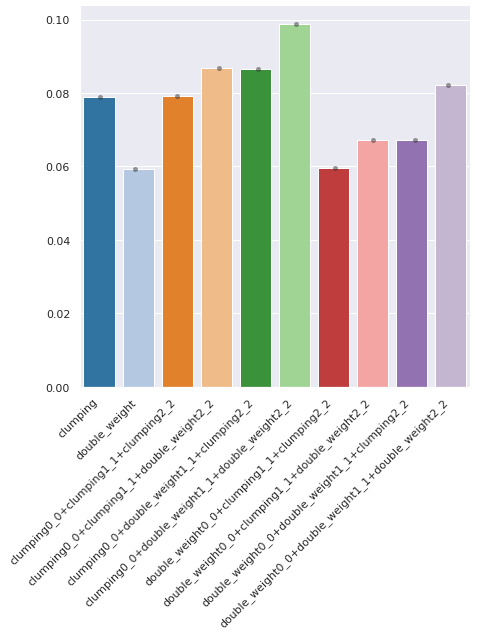

In [25]:
tprs.visualization.visualize_performance(processor_UKBB,metric="coef_squared",plot_type="bar_plot",cmap="tab20")